
# GEOG315: Applying Deep Learning to Earth Observation
## Final Project Report


## Introduction


In the field of earth observation, the evolution of labels and their corresponding scarcity, particularly in certain regions and ecosystems, demands the use of transductive transfer learning approaches. Transductive learning is a form of transfer learning that focuses of developing models capable of generalizing to new domains with limited annotated datasets for the same task. In Agricultural Field Boundary Delineation, very limited large-scale field crop maps are openly available. Hence, it is important to have generalizable field boundary delineation models that can be transferred across different satellite input modalities. In this project, we explored the transfer learning method of transductive learning for the task of field boundary delineation using models trained on high-resolution earth observation images transferred to very-high resolution earth observation images in data-scare region like Africa. We experimented with the capabilities of field boundary delineation model developed within the Agricultural Impact Research Group to learn features from the large-scale Field of the World datasets and transfer to high-resolution Planet datasets for the same kind of task. We report the performance of this model when an already trained UNet with an EfficientNet b3 backbone was directly transferred to the Lacuna Labels, and the performance when another UNet look-alike model with deeper layers was trained on the FTW datasets and transferred to the Lacuna Labels. The results shows a decline in the performance of the model in adequately delineating the field boundaries (as a third class), but it was very effective in predicting the fields themselves. 

## Methods

#### Datasets

In this project, we experimented with two large-scale datasets for agricultural field boundary delineation. 
1. **Fields of the World:** A benchmark dataset designed for instance and semantic segmentation of agricultural field boundaries by harmonizing some open datasets into 1.6 million parcel boundaries and over 70,000 Sentinel-2 image samples covering diverse agricultural landscapes across 4 continents. These spans these 24 countries: 1. Austria, 2. Belgium, 3. Brazil, 4. Cambodia, 5. Corsica, 6. Croatia, 7. Denmark, 8. Estonia, 9. Finland, 10. France, 11. Germany, 12. India, 13. Kenya, 14. Latvia, 15. Lithuania, 16. Luxembourg, 17. Netherlands, 18. Portugal, 19. Rwanda, 20. Slovakia, 21. Slovenia, 22. South Africa, 23. Spain, 24. Sweden, 25. Vietnam. It contains images f
2. **Lacuna Labels:** Is another benchmark datasets used for the semantic segmentaton of agricultural field boundaries in Africa. It comprises of very-high resolution Planet Imageries with over 33,000 samples spanning 34 countries. These 34 countries include: 1.	Angola, 2.	Burkina Faso, 3.	Burundi, 4.	Benin, 5.	Botswana, 6.	D.R. Congo, 7.	Central African Republic, 8.	Cote d’Ivoire, 9.	Cameroon, 10.	Eritrea, 11.	Ethiopia, 12.	Ghana, 13.	Gambia, 14.	Guinea, 15.	Kenya, 16.	Lesotho, 17.	Mali, 18.	Malawi, 19.	Mozambique, 20.	Namibia, 21.	Niger, 22.	Nigeria, 23.	Rwanda, 24.	Sudan, 25.	Senegal, 26.	Somalia, 27.	South Sudan, 28.	Chad, 29.	Togo, 30.	Tanzania, 31.	Uganda, 32.	South Africa, 33.	Zambia, 34.	Zimbabwe.
These datasets comprises of three classes -- Non-field, Field, and the Field Boundaries. See Sample visualizations of the respective datasets in Figure 1, below. 

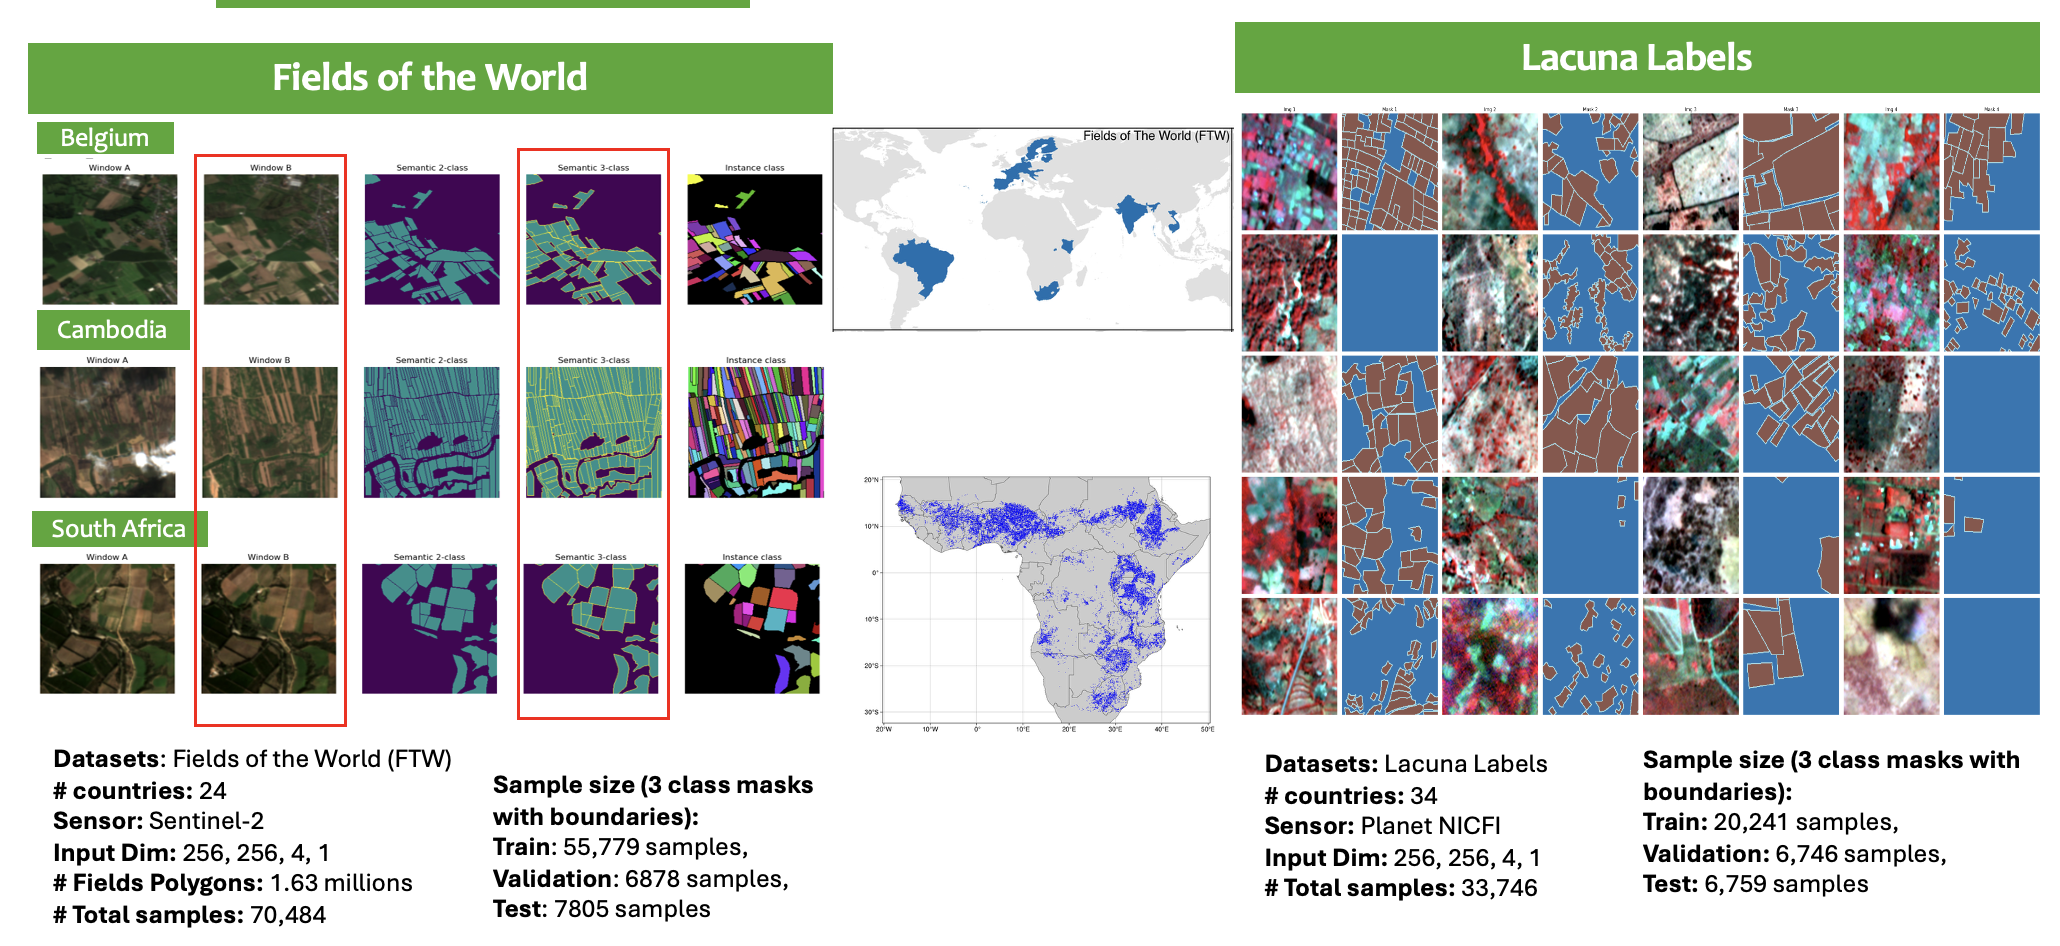 
*Figure 1: Visualization of random samples from the 1.) Fields of the World Datasets (Left), and 2.) Lacuna Labels (Right).* 

#### Approach

Our main goal for this project was to **Adapt Fields of the World datasets for Field Boundary Delineation in Africa from High-resolution Imageries using the Field Mapper UNET Model**. Detailed description on the respective models are provided in the model setup section below. To achieve this goal, we prepared three sub-goals: 
1.	Evaluate the performance of Pretrained FTW Models on Boundary Delineation Tasks in Africa; 
2.	Evaluate the performance of FieldMapper Model on the FTW Datasets (End to End Learning); and 
3.	Transfer newly trained FieldMapper Model to Lacuna Labels (in Africa). 

Hence, our approach was split into two main tasks:

**1. An End-to-End Learning Task using the FieldMapper UNET on the FTW Global Datasets**, and 

**2. Two transfer learning task with Lacuna Labels as the target class**. 

This shows the performance of transductive transfer learning when the domain shift is in the image resolution (from larger pixel size to smaller granular pixel sizes). In the End-to-End Learning task, we trained the FieldMapper UNet model on the FTW Global Datasets and evaluated it on FTW Global Datasets. In the transfer learning task, we first evaluated a directed transfer of pretrained FTW model weights on Lacuna Labels, and then use the best model from our training from scratch to evaluate on the same model.

#### Model Set up
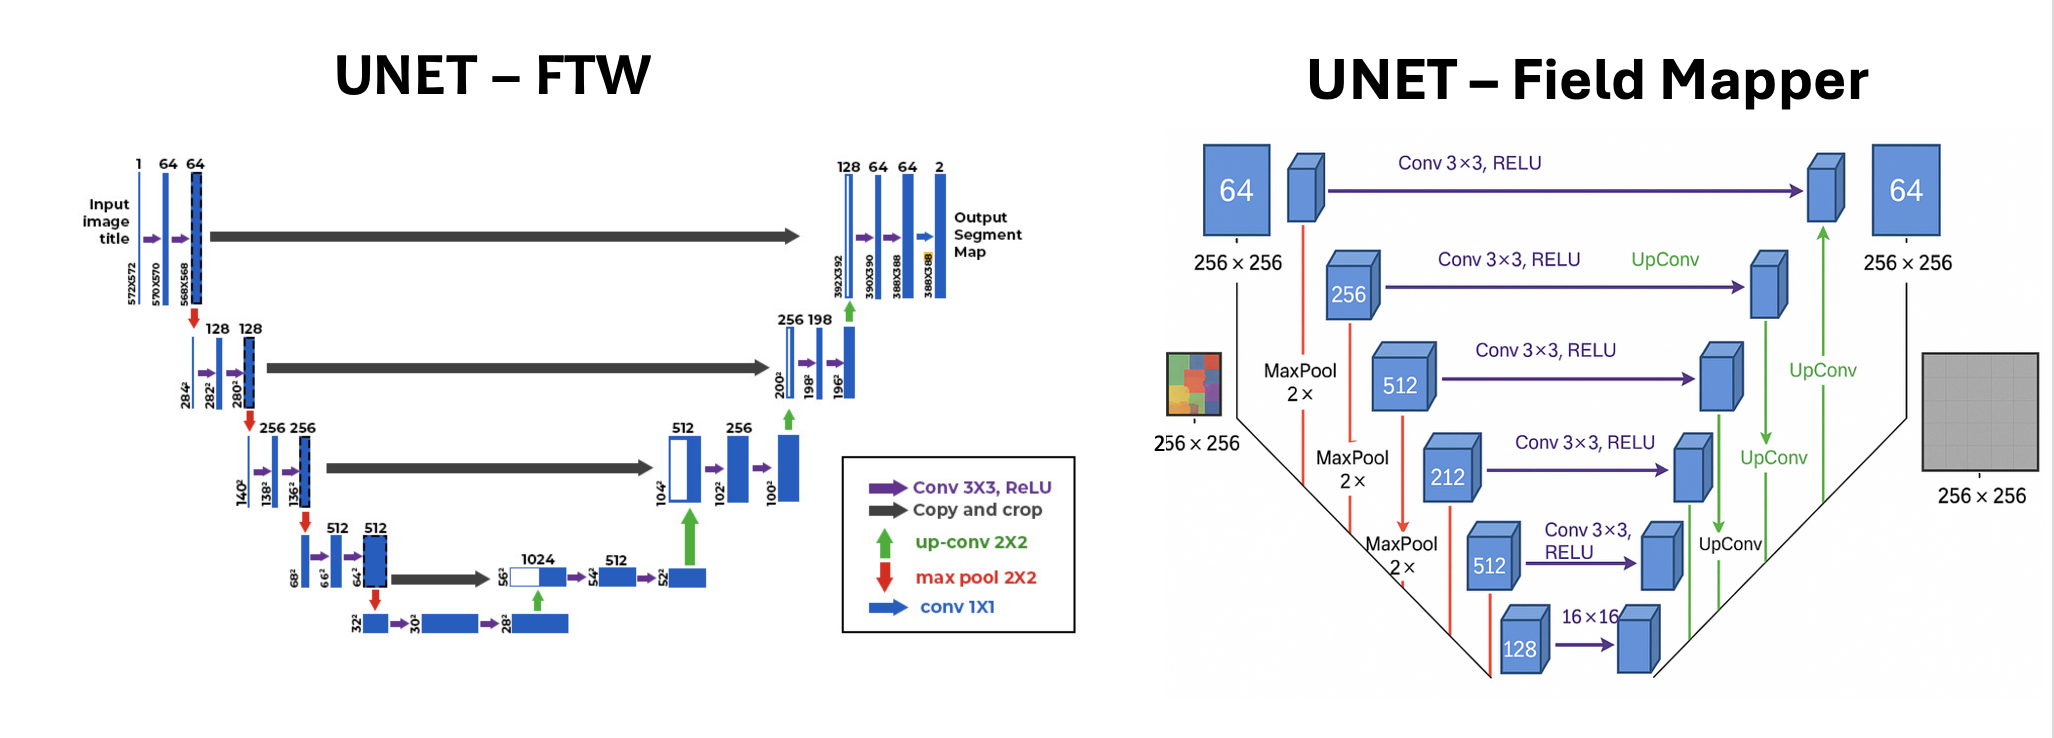
*Figure 2: Visualization of the 1.) FTW Model Architecture using UNet with EfficientNet b3 backbone (Left), and 2.) FieldMapper UNet using Random Initialization and Later Pretrained on FTW for the Finetuning task (Right).* 

#### Hyperparameter configuration
To train these models, we use the following hyperparamter configurations to keep things as comparable as possible:
Optimizer: Adam Optimizer
Scheduler: ReduceLROnPlateau (Reduce learning rate when the validation loss has stopped improving).
Training Batch Size: 32 for Lacuna Labels, 64 for FTW Labels. 
Validation Batch Size: 10 for Lacuna Labels, 64 for FTW Labels. 
Number of Epoch: 50
Normalization Strategy: Min Max Normalization
Loss Function: Tversky Focal Loss
Callbacks: Early Stopping with patience set to 10. 

#### Evaluation Metrics
The following evaluation metrics were used to ascertain the model performance on the respective datasets: Overall Accuracy, mIoU, F1-Score, Recall, and Precision as well as their class-wise derivatives. A confusion matrix plot is made to provide a quick overview of the model's performance on the respective classes.

## Results and Analysis

A brief description of the results, interleaved with any analytical steps. For instance, show: 1.) Your model training/fine-tuning loop; 2.) Your evaluation metrics; and 3.) Prediction code and predictions results (tiles/chips resulting from the prediction step). 

#### FieldMapper UNet End to End Learning on FTW datasets
##### 1.) Model Performance on Train, Val and Test Split

The model shows consistent performance across all three data splits, with overall accuracy approximately 87%, and balanced precision/recall. Notably:

- Overall Accuracy is stable across splits (~0.868).
- Mean IoU stays around 0.59–0.60, indicating moderate overlap between prediction and ground truth.
- F1 Score is ~0.70 across splits, confirming a good balance of precision and recall.

| Metric           | Train              | Val                | Test               |
| ---------------- | ------------------ | ------------------ | ------------------ |
| Overall Accuracy | 0.8685775366256563 | 0.866766171898579  | 0.8683982121864752 |
| Mean Accuracy    | 0.7450979530306219 | 0.7551236818297857 | 0.7518062173964832 |
| Mean IoU         | 0.5875656088933584 | 0.5925692823484955 | 0.5931984316270452 |
| Mean Precision   | 0.6752759323167238 | 0.6796775826135993 | 0.6802241977935437 |
| Mean Recall      | 0.7450979530306219 | 0.7551236818297857 | 0.7518062173964832 |
| Mean F1 Score    | 0.6965804354157973 | 0.7015638327001219 | 0.7018365585950085 |


##### 2.) Class-wise Model Performance on Train, Val and Test Split

Breakdown reveals strong segmentation of field and non-field classes, but field boundary detection remains challenging with low IoU and recall.

- Non-field Class : IoU > 0.85, Precision ~0.94, and F1 ~0.92 show excellent performance for background prediction.
- Field Class: Balanced metrics with IoU > 0.70, indicating accurate field delineation.
- Field Boundary Class: Underperforms with IoU ~0.21 and F1 ~0.35

| Class              | Metric    | Train               | Val                 | Test                |
| ------------------ | --------- | ------------------- | ------------------- | ------------------- |
| **Non-field**      | Accuracy  | 0.90572056          | 0.9010954427390045  | 0.90274545          |
|                    | IoU       | 0.8571547878872774  | 0.852221298         | 0.85275684          |
|                    | Precision | 0.9411258654722771  | 0.9401643807432222  | 0.9390242223183096  |
|                    | Recall    | 0.90572056          | 0.9010954427390045  | 0.90274545          |
|                    | F1 Score  | 0.92308384          | 0.9202154178447846  | 0.9205275299398676  |
| **Field**          | Accuracy  | 0.8188423958524249  | 0.8263270992257853  | 0.8287596077871476  |
|                    | IoU       | 0.69686003          | 0.7107477571177243  | 0.7127184226031191  |
|                    | Precision | 0.8238778408481621  | 0.8355654106421053  | 0.83580164          |
|                    | Recall    | 0.8188423958524249  | 0.8263270992257853  | 0.8287596077871476  |
|                    | F1 Score  | 0.8213524           | 0.8309205774616305  | 0.8322657282098662  |
| **Field boundary** | Accuracy  | 0.5107309020036169  | 0.5379485035245674  | 0.5239135955489631  |
|                    | IoU       | 0.20868200931677897 | 0.21473879222404413 | 0.21412003458989123 |
|                    | Precision | 0.26082409062973233 | 0.26330295645547047 | 0.26584673066125136 |
|                    | Recall    | 0.5107309020036169  | 0.5379485035245674  | 0.5239135955489631  |
|                    | F1 Score  | 0.34530506404201183 | 0.3535555027939507  | 0.3527164176352914  |


##### 3.) Confusion Matrices for  Train, Val and Test Split, respectively.

The confusion matrices below illustrate class-wise prediction strength across Train, Validation, and Test splits. Each matrix is row-normalized, so values represent class-wise recall (i.e., the proportion of each true class that was correctly predicted).

- Non-field class is highly accurate across all splits (≥90% correct), with very little confusion.
- Field class performs well (~82–83% correct), with some leakage into adjacent non-field or boundary predictions.
- Field boundary class remains the most difficult to detect, with only ~51–54% correctly identified. The remainder tends to be confused mostly with the field class, which is understandable given their spatial proximity.

<p align="center">
  <img src="../out/ftw_train_epoch50_cm.png"  alt="Training Confusion Matrix" width="30%">
  <img src="../out/ftw_val_epoch50_cm.png"  alt="Validation Confusion Matrix" width="30%">
  <img src="../out/ftw_test_cm.png"  alt="Test Confusion Matrix" width="30%">
</p>


*Figure 3: Visualization of confusion matrices the 1.) Train set, 2.) Validation set, and 3.)Test set (Right).* 

##### 4.) Sample Visualization of Predictions
<img src="../out/ftw_e2e_test_pred_1.png" alt="Sample Prediction">
<img src="../out/ftw_e2e_test_pred_2.png" alt="Sample Prediction">
<img src="../out/ftw_e2e_test_pred_3.png" alt="Sample Prediction">
<img src="../out/ftw_e2e_test_pred_4.png" alt="Sample Prediction">

*Figure 4: Visualization of Sample predictions for End to End Learning based on Fields of the World Datasets.* 


#### FTW Baseline Finetuned on Lacuna 
##### 1.) Model Performance on Val and Test Split

The model fine-tuned on the Lacuna dataset achieved an overall accuracy of 60.2% on the validation split and 62.1% on the test split, reflecting a moderate ability to distinguish between broad classes like field and non-field regions. Mean accuracy remained consistent across both splits (~56–58%), but the Mean Intersection over Union (IoU) was relatively low, around 36.5–36.8%, indicating only modest spatial agreement between predicted and ground-truth masks. Mean F1 scores of approximately 0.51 further support that, while the model performs acceptably on average, class-wise performance varies significantly. Additionally, precision remained below recall in both splits, which suggests the model tends to over-predict some classes, leading to increased false positives. These metrics imply that while the model retains general segmentation ability after transfer from FTW, its fine-grained performance, particularly in complex or underrepresented regions, remains limited.

| Metric           | Val                 | Test               |
| ---------------- | ------------------- | ------------------ |
| Overall Accuracy | 0.6022390276059282  | 0.6208958160222077 |
| Mean Accuracy    | 0.5624140624441211  | 0.5843753956916133 |
| Mean IoU         | 0.36768269968484857 | 0.3654846535567548 |
| Mean Precision   | 0.5234274315486567  | 0.5082771250728633 |
| Mean Recall      | 0.5624140624441211  | 0.5843753956916133 |
| Mean F1 Score    | 0.5175775402184002  | 0.5098701566861006 |


##### 2.) Class-wise Model Performance on Val and Test Split

Class-wise evaluation reveals that the non-field class performed best, with particularly high precision, 0.78 on validation and 0.85 on test, indicating strong confidence when labeling background regions. However, recall was significantly lower (~0.54–0.62), suggesting many actual non-field pixels were misclassified. The field class showed better balance between precision and recall, but its IoU decreased from 0.48 on validation to 0.40 on the test split, with an F1 score drop from 0.65 to 0.57, indicating reduced consistency across datasets. This decline suggests the model struggles more with generalizing field representations in the test environment. The field boundary class remains the most challenging, with IoU values around 0.13–0.15, low precision (~0.16–0.19), and F1 scores below 0.27. While recall was comparatively higher, the low precision indicates the model frequently mislabels non-boundary pixels as boundaries.  

| Class              | Metric    | Val                 | Test                |
| ------------------ | --------- | ------------------- | ------------------- |
| **non-field**      | Accuracy  | 0.543099390227217   | 0.6177172223686164  |
|                    | IoU       | 0.4705003897431067  | 0.5575445481343833  |
|                    | Precision | 0.7787475723340951  | 0.8512703555888337  |
|                    | Recall    | 0.543099390227217   | 0.6177172223686164  |
|                    | F1 Score  | 0.6399187555812917  | 0.7159275781899226  |
| **field**          | Accuracy  | 0.7024449274148082  | 0.6499266960767414  |
|                    | IoU       | 0.48092325653735346 | 0.40318072795319126 |
|                    | Precision | 0.6039614962980586  | 0.515027942826723   |
|                    | Recall    | 0.7024449274148082  | 0.6499266960767414  |
|                    | F1 Score  | 0.6494911257749203  | 0.5746668549835456  |
| **field boundary** | Accuracy  | 0.44169786969033775 | 0.48548226862948246 |
|                    | IoU       | 0.15162445277408543 | 0.13572868458268988 |
|                    | Precision | 0.18757322601381635 | 0.15853307680303313 |
|                    | Recall    | 0.44169786969033775 | 0.48548226862948246 |
|                    | F1 Score  | 0.2633227392989886  | 0.2390160368848336  |


##### 3.) Confusion Matrices for Val and Test Split, respectively.

The confusion matrices in Figure 5 reveal consistent patterns of class-wise misclassification across the validation and test splits. In the validation set, the model correctly predicts 54.3% of non-field, 70.2% of field, and only 44.2% of field boundary pixels, with substantial confusion between field and boundary classes. In the test set, performance improves slightly, with 61.8% of non-field and 48.5% of boundary pixels correctly identified, though field accuracy drops slightly to 65.0%. Across both splits, the field boundary class remains the most error-prone, with frequent misclassification as field, reflecting the challenge of capturing narrow, ambiguous features. These results reinforce the need for improved boundary-aware learning or targeted post-processing.

<p align="center">
  <img src="../out/ftw_baseline_epoch23_cm.png"  alt="Validation Confusion Matrix" width="45%">
  <img src="../out/ftw_baseline_test_cm.png"  alt="Test Confusion Matrix" width="45%">
</p>


*Figure 5: Visualization of confusion matrices the 1.) Validation set (Left) and 2.)Test set (Right).* 

##### 4.) Sample Visualization of Predictions
<p align="center">
  <img src="../out/ftw_baseline_pred_0.png"  alt="Sample Prediction">
 </p>
<p align="center">
  <img src="../out/ftw_baseline_pred_1.png"  alt="Sample Prediction">
 </p>
<p align="center">
  <img src="../out/ftw_baseline_pred_2.png"  alt="Sample Prediction">
 </p>
<p align="center">
  <img src="../out/ftw_baseline_pred_3.png"  alt="Sample Prediction">
 </p>

 *Figure 6: Visualization of Sample predictions for Baseline FTW Model Pretrained on Fields of the World datasets  Transfered to Lacuna Labels.* 


#### FieldMapper UNet Pretrained on FTW Finetuned on Lacuna
##### 1.) Model Performance on Val and Test Split

The FieldMapper UNet, pretrained on FTW and fine-tuned on Lacuna, achieved an overall accuracy of 61.4% on the validation set and 59.3% on the test set, reflecting modest classification performance across the board. The Mean IoU was 37.6% on validation and 34.5% on test, showing low spatial alignment between predictions and ground truth masks. Mean F1 scores were 0.53 on validation and 0.49 on test, indicating some drop in consistency when generalizing to the test split. The precision and recall values show slight imbalance, precision is lower than recall, implying the model may be over-predicting some classes. This level of performance shows that while the model benefits from FTW pretraining, it still faces generalization challenges on Lacuna data.

| Metric           | Val                | Test                |
| ---------------- | ------------------ | ------------------- |
| Overall Accuracy | 0.6141139666287505 | 0.5925025150356341  |
| Mean Accuracy    | 0.5631135266011643 | 0.5708817830441627  |
| Mean IoU         | 0.3758374302596621 | 0.34488361719248833 |
| Mean Precision   | 0.5248331689555158 | 0.49342907237833805 |
| Mean Recall      | 0.5631135266011643 | 0.5708817830441627  |
| Mean F1 Score    | 0.5252873619870996 | 0.4903142604541004  |



##### 2.) Class-wise Model Performance on Val and Test Split

Across classes, the non-field class performed best, with IoU values of 0.50 (val) and 0.52 (test), and F1 scores of 0.66 and 0.69, respectively. The model showed high precision in this class (up to 0.84 on test), which suggests confident predictions with relatively few false positives. The field class had stable recall (~0.64), but lower precision, especially in the test set, leading to a decline in performance: IoU dropped to 0.38, and F1 to 0.55. The field boundary class continued to underperform, with IoU around 13–15%, and F1 scores below 0.27, indicating persistent difficulty in identifying thin, low-representation features.

| Class              | Metric    | Val                 | Test                |
| ------------------ | --------- | ------------------- | ------------------- |
| **non-field**      | Accuracy  | 0.5857166365670587  | 0.5791517102429676  |
|                    | IoU       | 0.49598194033303916 | 0.5233521014519343  |
|                    | Precision | 0.7640048451433344  | 0.844525972490706   |
|                    | Recall    | 0.5857166365670587  | 0.5791517102429676  |
|                    | F1 Score  | 0.6630854650860591  | 0.687105890953402   |
| **field**          | Accuracy  | 0.6805370504100031  | 0.637349097887262   |
|                    | IoU       | 0.4784003899852348  | 0.3780487388309016  |
|                    | Precision | 0.6169520194987566  | 0.4816578120072593  |
|                    | Recall    | 0.6805370504100031  | 0.637349097887262   |
|                    | F1 Score  | 0.6471865040430795  | 0.5486725224996436  |
| **field boundary** | Accuracy  | 0.4230868928264313  | 0.4961445410022583  |
|                    | IoU       | 0.15312996046071228 | 0.13325001129462916 |
|                    | Precision | 0.1935426422244562  | 0.1541034326370488  |
|                    | Recall    | 0.4230868928264313  | 0.4961445410022583  |
|                    | F1 Score  | 0.26559011683215994 | 0.23516436790925568 |


##### 3.) Confusion Matrices for  Train, Val and Test Split, respectively.

Normalized confusion matrices for the validation and test splits, offering insight into class-specific prediction behavior. In the validation set, the model correctly identified 58.6% of non-field, 68.1% of field, and 42.3% of field boundary pixels. The primary confusion occurred between field and field boundary classes, with nearly 34% of boundary pixels misclassified as field. In the test set, performance was similar, with slightly lower field accuracy at 63.7%, but improved boundary detection at 49.6% recall. Across both splits, field boundaries remain the most frequently confused class, especially with fields, highlighting the ongoing difficulty in segmenting narrow and ambiguous features. These results align with the IoU and F1 trends and highlight the need for boundary-aware post-processing strategies.

<p align="center">
  <img src="../out/ftw_finetune_val_cm.png"  alt="Validation Confusion Matrix" width="45%">
  <img src="../out/ftw_finetune_test_cm.png"  alt="Test Confusion Matrix" width="45%">
</p>

*Figure 7: Visualization of confusion matrices the 1.) Validation set (Left) and 2.)Test set (Right).* 

##### 4.) Sample Visualization of Predictions
<p align="center">
  <img src="../out/ftw_finetune_pred_0.png"  alt="Sample Predictions">
 </p>
<p align="center">
  <img src="../out/ftw_finetune_pred_1.png"  alt="Sample Predictions">
 </p>
<p align="center">
  <img src="../out/ftw_finetune_pred_2.png"  alt="Sample Predictions">
 </p>
<p align="center">
  <img src="../out/ftw_finetune_pred_3.png"  alt="Sample Predictions">
 </p>
 
*Figure 8: Visualization of Sample predictions for FieldMapper UNET Pretrained on Fields of the World datasets Transfered to Lacuna Labels.* 


## Discussion

In this project, we have trained an End to End Learning Model using the FieldMapper UNet, described in our method section above, on the Fields of the World datasets. This model was evaluated on the held-out test sets on Fields of the World and reach competitive performance with an overall accuracy of 86.84%, mIoU of 0.59, and a mean F1 Score of 0.70. It equally reach competitive performance on the classes on two of the classes, but struggles with the field boundary class. For example an accuracy of 90.27% and IoU of 0.8527 on the non-field class, an accuracy of 82.87% and IoU of 0.7127 on the field class, however it achieves an accuracy of 52.39% and an IoU of 0.2141 on the field boundary class. This could be attributed to the class imbalance in the dataset, with Non-field having the largest presence, and field boundary the smallest (pixel-wise). A visual inspection of the results, shown in the sample visualizations of some of the predictions above, shows either a total miss of the field boundaries or in some cases an over-prediction of the boundaries.
In the transfer learning configuration, we experimented with a direct transfer of the FTW UNet Model pretrained on the Fields of the World Dataset and a transfer of our newly trained FieldMapper UNet to the Lacuna Labels in Africa. Here we compare the respective performances on the held-out test set. The direct transfer of the FTW UNet Model weight reaches an overall accuracy of 62.08%, mIoU of 0.5843, and mean F1 Score of 0.5098 on the Lacuna Labels, whereas the transfer of the FieldMapper UNet reaches an overall accuracy of 59.25%, mIoU of 0.3448, and mean F1 Score of 0.4903 on the same sets of labels. A similar pattern as mentioned earlier was observed in the per class performance for both model set up, however the FTW UNet slightly perform better than the FieldMapper UNet. For the FTW UNet we observed an accuracy of 61.77%, IoU of 0.5575 and an F1 of 0.7159 on the non-field class, an accuracy of 64.99%, IoU of 0.4031 and an F1 of 0.5747 on the field class, an accuracy of 48.54%, an IoU of 0.1357, and an F1 of 0.2390 on the field boundary class. For the FieldMapper UNet, we observed an accuracy of 57.91%, IoU of 0.5233 and an F1 of 0.6871 on the non-field class, an accuracy of 63.73%, IoU of 0.3780 and an F1 of 0.5486 on the field class, an accuracy of 49.61%, an IoU of 0.1332, and an F1 of 0.2351 on the field boundary class. Figure 9 and 10 shows these visually for easier comparison. Overall, transfer learning from FTW to Lacuna showed moderate improvements, though boundary segmentation remains significantly low compared to the other classes, this appears to be largely due to the class imbalance in respective dataset. 


<p align="center">
  <img src="../out/metrics_comparison_1.png"  alt="Overall metrics comparison on test set">
 </p>
 
*Figure 9: Comparison of Evaluation Metrics on the held-out test sets on FTW Data and Lacuna Labels for the respective model configurations (1.) FieldMapper UNet (with FTW inputs), 2.) FTW UNet finetuned on Lacuna Labels, and 3.) FieldMapper UNet finetuned on Lacuna Labels* 

<p align="center">
  <img src="../out/non_field_metrics_comparison_1.png"  alt="Test Metric Comparison on the Non-field class" width="30%">
  <img src="../out/field_metrics_comparison_1.png"  alt="Test Metric Comparison on the Field class" width="30%">
  <img src="../out/field_boundary_metrics_comparison_1.png"  alt="Test Metric Comparison on the Field Boundary class" width="30%">
</p>

*Figure 10: Comparison of Evaluation Metrics Per Class on the held-out test sets on FTW Data and Lacuna Labels for the respective model configurations (1.) FieldMapper UNet (with FTW inputs), 2.) FTW UNet finetuned on Lacuna Labels, and 3.) FieldMapper UNet finetuned on Lacuna Labels* 





### Difficulties & surprises encountered
1. **Data-loader issues**:     Lacuna catalog returns `(img, mask, meta)` while FTW loaders return `{"image":…, "mask":…}`.  Several cells had to be patched with a tiny “take\_first\_two” helper to prevent `ValueError: too many values to unpack`.                                                 |
2. **Ignore-index confusion**: Mask value `3` is “void” in FTW but a legal class in Lacuna.
3. **Memory limitaion and the use of Multi-GPU:** Training on the Field of the World dataset required the use of Multi GPU due to large scale of the datasets. This was achieved using the  `DataParallel` method in Pytorch. However, moving the wrapped `DataParallel` *after* loading the checkpoint produced the  *“module must have its parameters and buffers on device cuda:0”* errors.  The fix that finally worked was to first load it on CPU  and only then send it to a specific gpu device e.g. cuda:0*.
4. **Visual inspection**: Even the best model often “eats into” large homogeneous fields, drawing the boundary a few pixels inside whereas very small fields (< 1 ha) are frequently missed entirely.

### Potential future improvements
1. **Boundary-aware loss and optimization:** — For example, using the Sharpness Aware Minimization Optimization method, or adding some extra loss to penalise the ≈ 2–3 px erosion seen in inference.
2. **Oversampling Hard-examples:**  For example, it might be useful to track tiles whose boundary IoU < 0.2 and oversample them for another 1–2 epochs.
3. **Post-processing:** With some morphological dilation and eroson could help get better edges and thinner lines

Hence, we have show that for field boundary delineation, **pre-training on FTW gives a very usable starting point for African field-boundary mapping, but dedicated boundary-centric modification and loss are still needed improve the perform beyond 0.5 mIoU range**.